## Human Resources Analytics: Predicting Employee Churn in Python

In [1]:
# Import pandas (as pd) to read the data
import pandas as pd

# Read "turnover.csv" and save it in a DataFrame called data
data = pd.read_csv("turnover.csv")

# Take a quick look to the first 5 rows of data
print(data.head())

# Get some information on the types of variables in data
data.info()

   satisfaction  evaluation  number_of_projects  average_montly_hours  \
0          0.38        0.53                   2                   157   
1          0.80        0.86                   5                   262   
2          0.11        0.88                   7                   272   
3          0.72        0.87                   5                   223   
4          0.37        0.52                   2                   159   

   time_spend_company  work_accident  churn  promotion department  salary  
0                   3              0      1          0      sales     low  
1                   6              0      1          0      sales  medium  
2                   4              0      1          0      sales  medium  
3                   5              0      1          0      sales     low  
4                   3              0      1          0      sales     low  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 column

In [2]:
# You have two columns of type object, department and salary, which are actually categorical

# Print the unique values of the "department" column
print(data.department.unique())

# Print the unique values of the "salary" column
print(data.salary.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


As you can see, ['low' 'medium' 'high'] is ordered, but ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT' 'product_mng' 'marketing' 'RandD'] isn't.

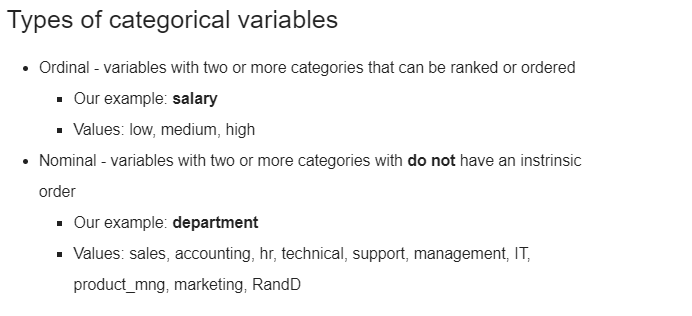

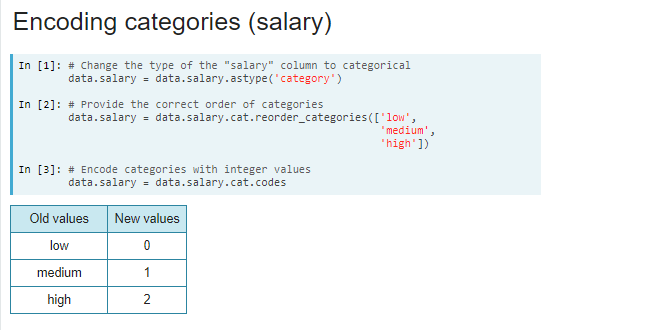

In [3]:
# Transforming Categorical Variables

# Transforming Ordered/Level variables

# Change the type of the "salary" (Ordinal) column to categorical
data.salary = data.salary.astype('category')

# Provide the correct order of categories
data.salary = data.salary.cat.reorder_categories(['low', 'medium', 'high'])

# Encode categories
data.salary = data.salary.cat.codes

In [4]:
data.head()

# Our salary column is now encoded as an ordered category, and optimized for our prediction algorithm

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [5]:
# Transforming Nominal/No order-level variables

# Get dummies and save them inside a new DataFrame
departments = pd.get_dummies(data.department)

# Take a quick look to the first 5 rows of the new DataFrame called departments
print(departments.head())

   IT  RandD  accounting  hr  management  marketing  product_mng  sales  \
0   0      0           0   0           0          0            0      1   
1   0      0           0   0           0          0            0      1   
2   0      0           0   0           0          0            0      1   
3   0      0           0   0           0          0            0      1   
4   0      0           0   0           0          0            0      1   

   support  technical  
0        0          0  
1        0          0  
2        0          0  
3        0          0  
4        0          0  


There are 10 departments in the dataset, so you now get 10 columns. The first five rows in your dataset refer to people working in the technical department, so you get values equal to 1 in the department column, and values equal to 0 in the others.

In [6]:
data.tail()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,0
14995,0.37,0.48,2,160,3,0,1,0,support,0
14996,0.37,0.53,2,143,3,0,1,0,support,0
14997,0.11,0.96,6,280,4,0,1,0,support,0
14998,0.37,0.52,2,158,3,0,1,0,support,0


In [7]:
# Dummy Variable Trap

# Drop the "accounting" column to avoid "dummy trap"
departments = departments.drop("accounting", axis=1)

# Drop the old column "department" as you don't need it anymore
data = data.drop("department", axis=1)

# Join the new dataframe "departments" to your employee dataset: done
data = data.join(departments)

In [8]:
data.tail()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary,IT,RandD,hr,management,marketing,product_mng,sales,support,technical
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,0,1,0
14998,0.37,0.52,2,158,3,0,1,0,0,0,0,0,0,0,0,0,1,0


### Descriptive Statistics

In [9]:
# A negative correlation doesn’t mean the correlation between both variables is weak, 
# In this case, it means that they are inversely correlated (and in this case, strongly inversely correlated).

# Use len() function to get the total number of observations and save it as the number of employees
n_employees = len(data)

# Print the number of employees who left/stayed
print(data.churn.value_counts())

# Print the percentage of employees who left/stayed
print(data.churn.value_counts()/n_employees*100)

0    11428
1     3571
Name: churn, dtype: int64
0    76.191746
1    23.808254
Name: churn, dtype: float64


As you can see, 11,428 employees stayed, which accounts for about 76% of the total employee count. Similarly, 3,571 employees left, which accounts for about 24% of them.

In [10]:
# Overfitting - an error that occurs when model works well enough for the dataset it was developed on (train) but is not 
# useful outside of it (test)

# Splitting the data

# Set the target and features

# Choose the dependent variable column (churn) and set it as target
target = data.churn

# Drop column churn and set everything else as features
features = data.drop("churn",axis=1)

In [11]:
# Import the function for splitting dataset into train and test
from sklearn.model_selection import train_test_split

# Use that function to create the splits both for target and for features
# Set the test sample to be 25% of your observations
target_train, target_test, features_train, features_test = train_test_split(target,features,test_size=0.25,random_state=42)

#### Decision Tree

Splitting rules:

Gini: 2*p*(1-p)

Entropy: -p*log(p) - (1-p)*log(1-p)

The gini index ranges from 0 to 1, so it can never be negative.

In [13]:
#number of people who stayed/left
stayed = 37
left = 1138

#sum of stayed and left
total = stayed + left

#gini index
gini = 2*(stayed/total)*(left/total)

print(gini)

0.060995563603440474


In [14]:
# Gini index in case of splitting by variable A or B
gini_A = 0.65
gini_B = 0.15


# Gini index in case of splitting by variable A or B
gini_A = 0.65
gini_B = 0.15

# check which Gini is lower and use it for spliting
if gini_A < gini_B:
    print("split by A!")
else:
    print("split by B!")

split by B!


In [15]:
# Predicting employee churn using decision trees

# Import the classification algorithm
from sklearn.tree import DecisionTreeClassifier

# Initialize it and call model by specifying the random_state parameter
model = DecisionTreeClassifier(random_state=42)

# Apply a decision tree model to fit features to the target
model.fit(features_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [17]:
# Check the accuracy score of the prediction for the training set
print(model.score(features_train, target_train)*100)

# Check the accuracy score of the prediction for the test set
model.score(features_test, target_test)*100

100.0


97.22666666666666

As expected, your algorithm did perfectly on the training set. On the testing set, it was able to correctly predict if an employee would leave or not in almost 98% of the cases! Excellent!

In [18]:
# Decision Tree Interpretation

# Exporting the Tree

# Import the graphical visualization export function
from sklearn.tree import export_graphviz

# Apply Decision Tree model to fit Features to the Target
model.fit(features_train,target_train)

# Export the tree to a dot file
export_graphviz(model,"tree.dot")

# webgraphviz.com, Copy Paste the Viz model

Overfitting is a classic problem in analytics, especially for the decision tree algorithm. Once the tree is fully grown, it may provide highly accurate predictions for the training sample, yet fail to be that accurate on the test set. For that reason, the growth of the decision tree is usually controlled by:

“Pruning” the tree and setting a limit on the maximum depth it can have.

Limiting the minimum number of observations in one leaf of the tree.


In [19]:
# Tuning employee turnover classifier

# To limit Overfitting, Limiting the Tree Maximum Depth and Limiting minimum sample size in leaf

# Pruning the tree

# Initialize the DecisionTreeClassifier while limiting the depth of the tree to 5
model_depth_5 = DecisionTreeClassifier(max_depth =5, random_state=42)

# Fit the model
model_depth_5.fit(features_train,target_train)

# Print the accuracy of the prediction for the training set
print(model_depth_5.score(features_train,target_train)*100)

# Print the accuracy of the prediction for the test set
print(model_depth_5.score(features_test,target_test)*100)

97.71535247577563
97.06666666666666


Limiting the sample size

Another method to prevent overfitting is to specify the minimum number of observations necessary to grow a leaf (or node), in the Decision Tree.

In [20]:
# Limiting the sample size

# Initialize the DecisionTreeClassifier while limiting the sample size in leaves to 100
model_sample_100 = DecisionTreeClassifier(min_samples_leaf = 100, random_state=42)

# Fit the model
model_sample_100.fit(features_train,target_train)

# Print the accuracy of the prediction (in percentage points) for the training set
print(model_sample_100.score(features_train,target_train)*100)

# Print the accuracy of the prediction (in percentage points) for the test set
print(model_sample_100.score(features_test,target_test)*100)

96.57747355320473
96.13333333333334


In [22]:
# Calculating accuracy metrics: precision

# Import the function to calculate precision score
from sklearn.metrics import precision_score

# Predict whether employees will churn using the test set
prediction = model.predict(features_test)

# Calculate precision score by comparing target_test with the prediction
precision_score(target_test, prediction)

0.9240641711229947

In [23]:
# Calculating accuracy metrics: recall

# Import the function to calculate recall score
from sklearn.metrics import recall_score

# Use the initial model to predict churn
prediction = model.predict(features_test)

# Calculate recall score by comparing target_test with the prediction
recall_score(target_test, prediction)

0.9632107023411371

Targeting both leavers and stayers: Calculating the ROC/AUC score

While the Recall score is an important metric for measuring the accuracy of a classification algorithm, it puts too much weight on the number of False Negatives. On the other hand, Precision is concentrated on the number of False Positives.

The combination of those two results in the ROC curve allows us to measure both recall and precision. The area under the ROC curve is calculated as the AUC score.

In [24]:
# Import the function to calculate ROC/AUC score
from sklearn.metrics import roc_auc_score

# Use initial model to predict churn (based on features_test)
prediction = model.predict(features_test)

# Calculate ROC/AUC score by comparing target_test with the prediction
roc_auc_score(target_test, prediction)

0.9691623087590718

Class Imbalance - We will calculate Prior Probablity

Balancing classes
It can significantly affect prediction results, as shown by the difference between the recall and accuracy scores. To solve the imbalance, equal weights are usually given to each class. Using the class_weight argument in sklearn's DecisionTreeClassifier, one can make the classes become "balanced".

In [25]:
# Initialize the DecisionTreeClassifier 
model_depth_5_b = DecisionTreeClassifier(max_depth=5,class_weight="balanced",random_state=42)

# Fit the model
model_depth_5_b.fit(features_train,target_train)

# Print the accuracy of the prediction (in percentage points) for the test set
print(model_depth_5_b.score(features_test,target_test)*100)

93.70666666666668


In [27]:
# Comparison of Employee attrition models.

#  The imbalanced model is already done using recall and ROC/AUC scores. Complete the same steps for the balanced model.

# Imbalanced Data
# Print the recall score
print(recall_score(target_test,prediction))
# Print the ROC/AUC score
print(roc_auc_score(target_test,prediction))

# Balanced Data
# Initialize the model
model_depth_7_b = DecisionTreeClassifier(max_depth=7, random_state=42, class_weight = "balanced")
# Fit it to the training component
model_depth_7_b.fit(features_train,target_train)
# Make prediction using test component
prediction_b = model_depth_7_b.predict(features_test)
# Print the recall score for the balanced model
print(recall_score(target_test,prediction_b))
# Print the ROC/AUC score for the balanced model
print(roc_auc_score(target_test,prediction_b))

0.9632107023411371
0.9691623087590718
0.9319955406911928
0.959863876199084


#### HyperParameter Tuning using GridSearchCV and Cross Validation

Cross-validation using sklearn

Overfitting the dataset is a common problem in analytics. This happens when a model has learned the data too closely: it has great performances on the dataset it was trained on, but fails to generalize outside of it.

While the train/test split technique ensures that the model does not overfit the training set, hyperparameter tuning may result in overfitting the test component, since it consists in tuning the model to get the best prediction results on the test set. Therefore, it is recommended to validate the model on different testing sets. K-fold cross-validation allows us to achieve this:

- it splits the dataset into a training set and a testing set
- it fits the model, makes predictions and calculates a score (you can specify if you want the accuracy, precision, recall...)
- it repeats the process k times in total
- it outputs the average of the 10 scores

In [28]:
# Import the function for implementing cross validation
from sklearn.model_selection import cross_val_score

# Use that function to print the cross validation score for 10 folds
print(cross_val_score(model,features,target,cv=10))

[0.9853431  0.98533333 0.97466667 0.96466667 0.96       0.97933333
 0.99       0.99333333 1.         1.        ]


In [30]:
# Setting Up GridSearch CV Parameters dictionary 

# Generate values for maximum depth
depth = [i for i in range(5,21,1)]

# Generate values for minimum sample size
samples = [i for i in range(50,500,50)]

# Create the dictionary with parameters to be checked
parameters = dict(max_depth=depth, min_samples_leaf=samples)

In [35]:
# import the GridSearchCV function
from sklearn.model_selection import GridSearchCV

# initialize the param_search function using the GridSearchCV function, initial model and parameters above
param_search = GridSearchCV(model, parameters)

# fit the param_search to the training dataset
param_search.fit(features_train, target_train)

# print the best parameters found
print(param_search.best_params_)

{'min_samples_leaf': 50, 'max_depth': 5}


The values that give you the best score are a minimum of samples per leaf of 100 and a maximum depth of 5.

#### Important features for predicting attrition

Decision Tree Algorithms provide Interpretablity

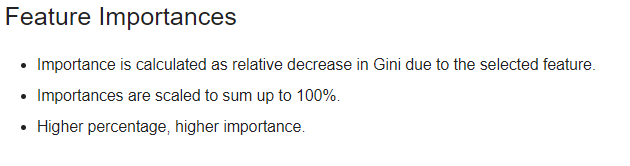

In [41]:
# Calculating and Sorting Important Features

# Calculate feature importances
feature_importances = model_depth_7_b.feature_importances_

# Create a list of features: done
feature_list = list(features)

# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort values to learn most important features
relative_importances.sort_values(by="importance", ascending=False)

# It seems that satisfaction is by far the most impactful feature on the decision to leave the company or not.

,importance
satisfaction,0.465858
time_spend_company,0.355275
evaluation,0.106112
average_montly_hours,0.041802
number_of_projects,0.021349
salary,0.004363
technical,0.001993
hr,0.001602
sales,0.001019
support,0.000627


In [42]:
# Selecting important features

# select only features with relative importance higher than 1%
selected_features = relative_importances[relative_importances.importance>0.01]

# create a list from those features: done
selected_list = selected_features.index

# transform both features_train and features_test components to include only selected features
features_train_selected = features_train[selected_list]
features_test_selected = features_test[selected_list]

In [44]:
# Only Top Feature models are taken into Consideration

features_train_selected.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company
14480,0.38,0.86,6,139,6
1934,0.78,0.93,4,225,5
7900,0.56,0.71,5,243,3
2952,0.96,0.62,4,217,2
4367,0.83,0.53,3,211,4


In [45]:
# Develop and test the best model

# Initialize the best model using parameters provided in description
model_best = DecisionTreeClassifier(max_depth =8, min_samples_leaf =150, class_weight ='balanced', random_state=42)

# Fit the model using only selected features from training set: done
model_best.fit(features_train_selected, target_train)

# Make prediction based on selected list of features from test set
prediction_best = model_best.predict(features_test_selected)

# Print the general accuracy of the model_best
print(model_best.score(features_test_selected, target_test) * 100)

# Print the recall score of the model predictions
print(recall_score(target_test, prediction_best) * 100)

# Print the ROC/AUC score of the model predictions
print(roc_auc_score(target_test, prediction_best) * 100)

95.28
91.75027870680044
94.07002193314084
